In [1]:
! git clone https://github.com/Sarathisme/MNIST

Cloning into 'MNIST'...
remote: Enumerating objects: 70063, done.
remote: Counting objects: 100% (70063/70063), done.
remote: Compressing objects: 100% (70046/70046), done.
remote: Total 70063 (delta 23), reused 70052 (delta 12), pack-reused 0
Receiving objects: 100% (70063/70063), 41.98 MiB | 23.46 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Checking out files: 100% (70011/70011), done.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil

In [0]:
image = mpimg.imread('MNIST/data/train/4/0.png')

In [4]:
image.shape

(28, 28, 4)

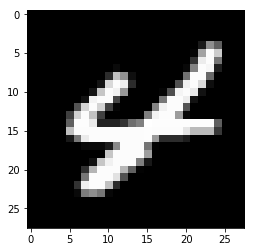

In [5]:
plt.imshow(image)
plt.show()

In [6]:
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dropout, Flatten, Dense, MaxPooling2D, Activation

Using TensorFlow backend.


In [0]:
input_shape = (28, 28, 3)

In [0]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(10)) 
model.add(Activation('sigmoid'))

In [0]:
model.compile(loss ='categorical_crossentropy', 
                     optimizer ='rmsprop', 
                   metrics =['accuracy'])

In [0]:
train_datagen = ImageDataGenerator( 
                rescale = 1. / 255, 
                 shear_range = 0.2, 
                  zoom_range = 0.2, 
            horizontal_flip = True) 

In [0]:
validation_datagen = ImageDataGenerator(rescale=1. / 255)

In [26]:
train_generator = train_datagen.flow_from_directory('MNIST/data/train', 
                              target_size =(28, 28), 
                     batch_size = 10, class_mode ='categorical')

Found 48700 images belonging to 10 classes.


In [27]:
validation_generator = validation_datagen.flow_from_directory('MNIST/data/test', target_size=(28, 28), batch_size=10, class_mode='categorical')

Found 300 images belonging to 10 classes.


In [32]:
model.fit_generator(train_generator, steps_per_epoch=48700/10, validation_data=validation_generator, validation_steps=300/10)

Epoch 1/1
2284/4870 [=============>................] - ETA: 4:24 - loss: nan - acc: 0.2034

KeyboardInterrupt: ignored